# Neural Network Optimizers

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
data = ds.load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Train / Test Split

In [3]:
X = df.drop(columns=['target'])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (353, 10)
Test Shape: (89, 10)


## Neural Network

In [4]:
solvers = ["sgd", "adam"]
loss_curves = {}
error_metrics = {"sgd":{"train":{}, "test":{}},
                 "adam":{"train":{}, "test":{}}}

for solver in solvers:
    model = MLPRegressor(random_state=1,
                         max_iter=1000,
                         hidden_layer_sizes=(100, 50, 30, ),
                         n_iter_no_change=100,
                         early_stopping=True,
                         validation_fraction=0.1,
                         solver=solver,
                         verbose=False)
    model.fit(X_train, y_train)
    loss_curves[solver] = model.loss_curve_
    
    # error metrics: Train
    y_pred = model.predict(X_train)
    error_metrics[solver]["train"]["mae"] = mean_absolute_error(y_train, y_pred)
    # error_metrics[solver]["train"]["mse"] = mean_squared_error(y_train, y_pred, squared=True)
    error_metrics[solver]["train"]["rmse"] = mean_squared_error(y_train, y_pred, squared=False)
    
    # error metrics: Test
    y_pred = model.predict(X_test)
    error_metrics[solver]["test"]["mae"] = mean_absolute_error(y_test, y_pred)
    # error_metrics[solver]["test"]["mse"] = mean_squared_error(y_test, y_pred, squared=True)
    error_metrics[solver]["test"]["rmse"] = mean_squared_error(y_test, y_pred, squared=False)

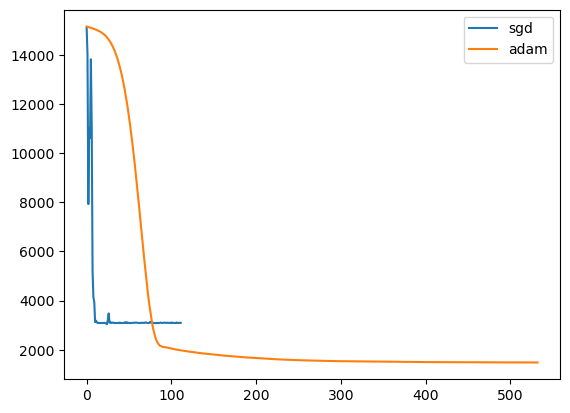

In [5]:
for key in loss_curves:
    plt.plot(loss_curves[key], label=key)

plt.legend()
plt.show()

In [6]:
error_metrics

{'sgd': {'train': {'mae': 65.64899305209306, 'rmse': 78.9866145346715},
  'test': {'mae': 62.639387107990444, 'rmse': 72.94556530541831}},
 'adam': {'train': {'mae': 43.732046030331766, 'rmse': 54.00707219949251},
  'test': {'mae': 42.587286444652925, 'rmse': 53.73537107802586}}}

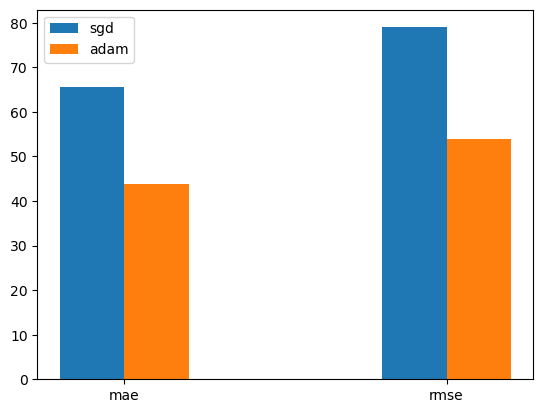

In [7]:
X_axis = np.arange(len(error_metrics))

plt.bar(X_axis - 0.1,
        error_metrics["sgd"]["train"].values(), 0.2, label="sgd")
plt.bar(X_axis + 0.1,
        error_metrics["adam"]["train"].values(), 0.2, label="adam")

plt.xticks(X_axis, error_metrics["adam"]["train"].keys())
plt.legend()
plt.show()

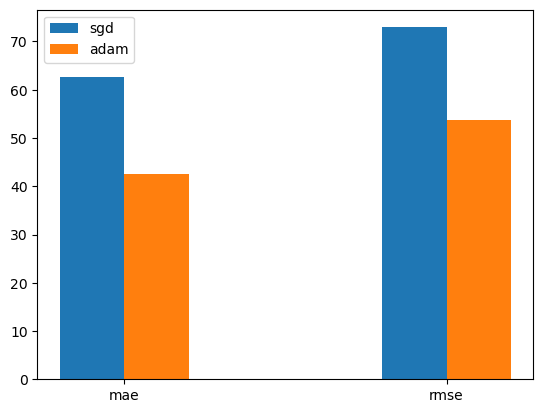

In [8]:
X_axis = np.arange(len(error_metrics))

plt.bar(X_axis - 0.1,
        error_metrics["sgd"]["test"].values(), 0.2, label="sgd")
plt.bar(X_axis + 0.1,
        error_metrics["adam"]["test"].values(), 0.2, label="adam")

plt.xticks(X_axis, error_metrics["adam"]["test"].keys())
plt.legend()
plt.show()